# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 11 (Thursday) 11:00 pm </b> </font>

<font color="blue"> Divya Patel </font>

# I. Introduction

* In this assignmnet, I implemented four classification methods QDA, LDA, Pocket algorithm and Logistic Regression. Algorithms are for binary classification.
* Here I used data of magic telescope reading. I devide my data in two part. One for training and second for testing. Using our classification algorithm, I try to classify test data. 
* I also tried to find accuracy of each algorithm. For that I used evalution matrix, ROC curve, PR curve and measurement like precision, recall etc. I also tried to understand when, where and how to use this measurment to find algorithm accuracy. 

# II. Data

## Introduction and Source Of Data

* I get data from https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope this link. This data has magic telescope reading. Magic telescopes means Major Atmospheric Gamma Imaging Cherenkov Telescopes. The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. 
* The data is size of 19020 instance and with 12 features. One feature has lable class which has two value g and h. Here g means gamma signal and h means hardon background.
* Owner of Data: R. K. Bock . 
  Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC) 
  http://wwwmagic.mppmu.mpg.de 
  rkb '@' mail.cern.ch 


## Attribute of Data

1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background) 

## Reading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('MagicTelescope.csv')
df.head() 
#read csv file in datafram

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,3,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,4,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,5,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Data Preprocessing

Finding missing and null value

In [3]:
np.any(df.isnull())


False

In [4]:
np.any(df.isna())

False

In [5]:
col_name = list(df)
col_name

['ID',
 'fLength:',
 'fWidth:',
 'fSize:',
 'fConc:',
 'fConc1:',
 'fAsym:',
 'fM3Long:',
 'fM3Trans:',
 'fAlpha:',
 'fDist:',
 'class:']

ID field is not important so drop from the dataframe.

In [6]:
df = df.drop(['ID'],axis=1)
df.head() #ID is not useful

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Class g assign to 1 and h assign to 0 to make whole data numeric.

In [10]:
df['class:'] = df['class:'].apply(lambda i :  1 if i=='g' else -1 )
df.head()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,-0.577211,-0.336795,-0.381120,0.062758,-0.148919,0.541028,0.224812,-0.405831,0.476803,-1.497826,1
1,-0.510955,-0.570012,-0.648578,0.820362,1.471737,0.516906,0.260357,-0.490081,-0.815397,0.153121,1
2,2.568210,6.205695,2.615714,-1.875834,-1.773194,2.044938,-1.478497,-2.182972,1.889174,0.842613,1
3,-0.694749,-0.687241,-1.029451,1.282035,1.606566,0.532757,-0.333506,-0.355350,-0.658786,-1.031436,1
4,0.516609,0.476371,0.711138,-0.347497,-0.284652,-0.020200,0.353077,1.036593,-0.881016,2.176369,1


In [9]:
pd.DataFrame(df).describe()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:
count,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04
mean,-4.303603e-15,3.753698e-15,7.310147e-15,1.457771e-14,2.879155e-15,5.977226e-18,-1.231309e-15,4.408204e-17,-2.402845e-15,-7.680735e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.155832e+00,-1.209032e+00,-1.869910e+00,-2.008756e+00,-1.939694e+00,-7.661113e+00,-6.712250e+00,-9.897733e+00,-1.059076e+00,-2.576353e+00
25%,-6.825033e-01,-5.623643e-01,-7.361785e-01,-7.905726e-01,-7.798526e-01,-2.745463e-01,-4.585934e-01,-5.329076e-01,-8.465409e-01,-6.867998e-01
50%,-3.800899e-01,-2.747766e-01,-1.807389e-01,-1.431903e-01,-1.643019e-01,1.409449e-01,9.350087e-02,1.999641e-02,-3.817940e-01,-2.631513e-02
75%,3.982551e-01,1.394582e-01,5.852387e-01,6.748581e-01,6.385608e-01,4.796037e-01,4.959254e-01,5.135869e-01,6.986710e-01,6.255143e-01
max,6.631130e+00,1.276574e+01,5.286268e+00,2.804355e+00,4.167401e+00,9.789073e+00,4.466175e+00,8.623301e+00,2.388722e+00,4.037679e+00


* Normalization of data using formula (x-mean)/std .
* We can also use [(x-min)/(max-min)]*[new_max-new_min]

In [7]:
ndf = (df.loc[:,df.columns!= 'class:']-df.loc[:,df.columns!= 'class:'].mean())/df.loc[:,df.columns!= 'class:'].std()
ndf.head()
#Normalization of data

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:
0,-0.577211,-0.336795,-0.381120,0.062758,-0.148919,0.541028,0.224812,-0.405831,0.476803,-1.497826
1,-0.510955,-0.570012,-0.648578,0.820362,1.471737,0.516906,0.260357,-0.490081,-0.815397,0.153121
2,2.568210,6.205695,2.615714,-1.875834,-1.773194,2.044938,-1.478497,-2.182972,1.889174,0.842613
3,-0.694749,-0.687241,-1.029451,1.282035,1.606566,0.532757,-0.333506,-0.355350,-0.658786,-1.031436
4,0.516609,0.476371,0.711138,-0.347497,-0.284652,-0.020200,0.353077,1.036593,-0.881016,2.176369


In [8]:
df = pd.concat([ndf,df.loc[:,'class:']],axis = 1)
df.head()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,-0.577211,-0.336795,-0.381120,0.062758,-0.148919,0.541028,0.224812,-0.405831,0.476803,-1.497826,g
1,-0.510955,-0.570012,-0.648578,0.820362,1.471737,0.516906,0.260357,-0.490081,-0.815397,0.153121,g
2,2.568210,6.205695,2.615714,-1.875834,-1.773194,2.044938,-1.478497,-2.182972,1.889174,0.842613,g
3,-0.694749,-0.687241,-1.029451,1.282035,1.606566,0.532757,-0.333506,-0.355350,-0.658786,-1.031436,g
4,0.516609,0.476371,0.711138,-0.347497,-0.284652,-0.020200,0.353077,1.036593,-0.881016,2.176369,g


## Visualization of Classification Data

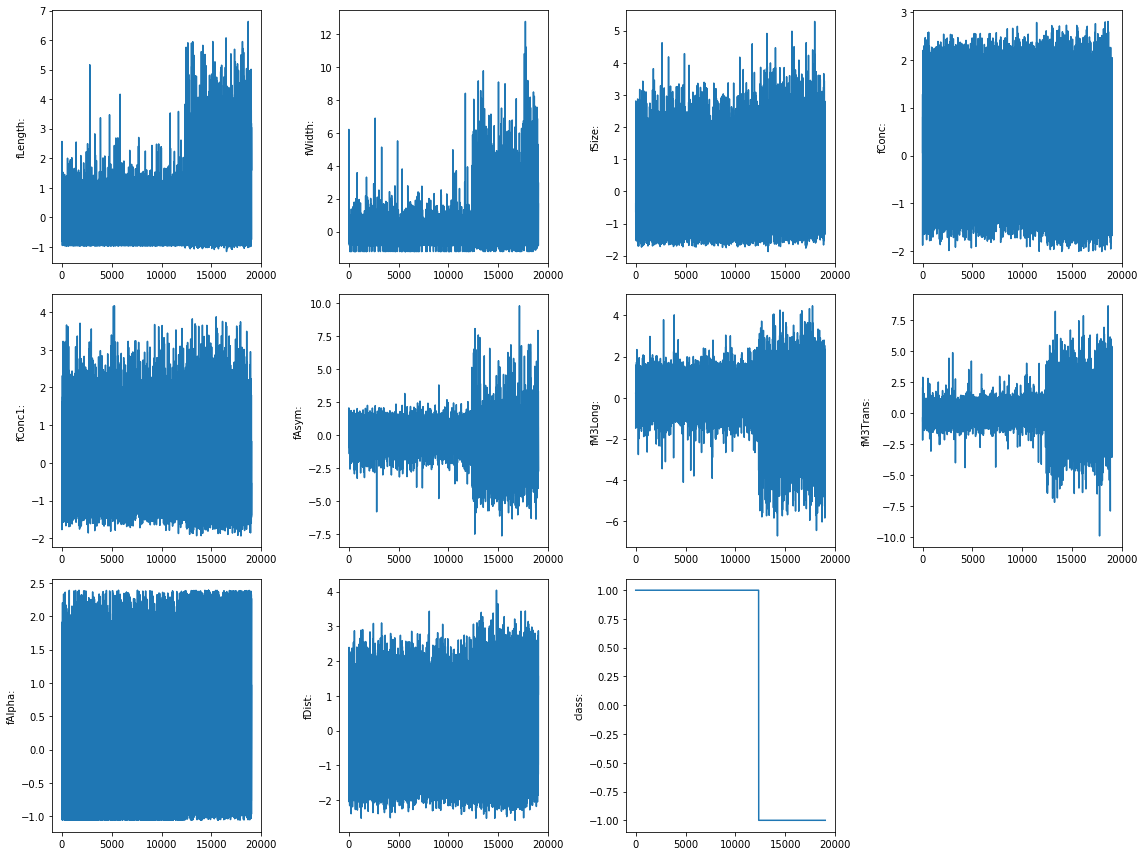

In [11]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(11):
    plt.subplot(3, 4, i+1)
    plt.plot(df.iloc[:, i])
    plt.ylabel(df.columns.values[i])
fig.tight_layout()
#visualization of every column one by one

In [12]:
df.describe()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
count,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,19020.000000
mean,-4.303603e-15,3.753698e-15,7.310147e-15,1.457771e-14,2.879155e-15,5.977226e-18,-1.231309e-15,4.408204e-17,-2.402845e-15,-7.680735e-16,0.296740
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.954983
min,-1.155832e+00,-1.209032e+00,-1.869910e+00,-2.008756e+00,-1.939694e+00,-7.661113e+00,-6.712250e+00,-9.897733e+00,-1.059076e+00,-2.576353e+00,-1.000000
25%,-6.825033e-01,-5.623643e-01,-7.361785e-01,-7.905726e-01,-7.798526e-01,-2.745463e-01,-4.585934e-01,-5.329076e-01,-8.465409e-01,-6.867998e-01,-1.000000
50%,-3.800899e-01,-2.747766e-01,-1.807389e-01,-1.431903e-01,-1.643019e-01,1.409449e-01,9.350087e-02,1.999641e-02,-3.817940e-01,-2.631513e-02,1.000000
75%,3.982551e-01,1.394582e-01,5.852387e-01,6.748581e-01,6.385608e-01,4.796037e-01,4.959254e-01,5.135869e-01,6.986710e-01,6.255143e-01,1.000000
max,6.631130e+00,1.276574e+01,5.286268e+00,2.804355e+00,4.167401e+00,9.789073e+00,4.466175e+00,8.623301e+00,2.388722e+00,4.037679e+00,1.000000


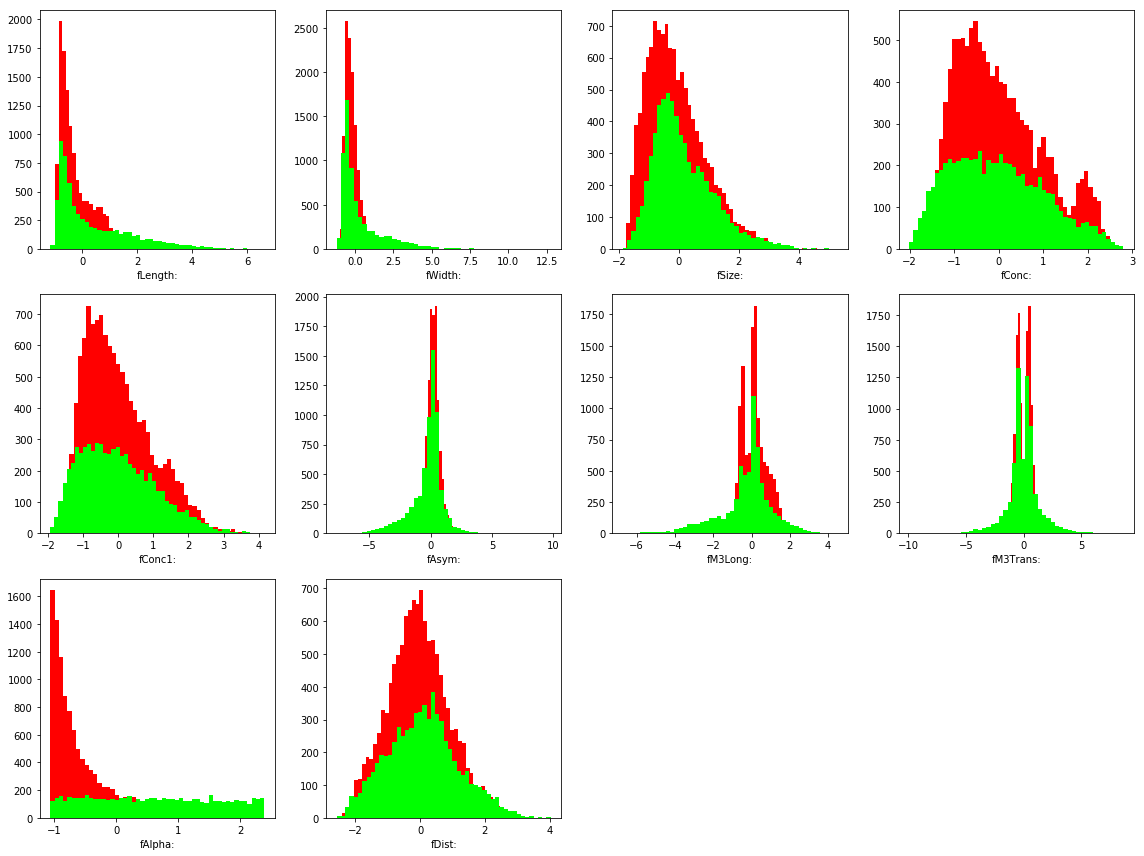

In [13]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.hist(df[df['class:']==1].iloc[:, i], 50,color = 'red')
    plt.hist(df[df['class:']==-1].iloc[:, i], 50,color = 'lime')
    plt.xlabel(df.columns.values[i])
fig.tight_layout()
# Stacked bar chart with x axis is features and y axis is count of class

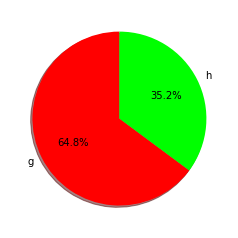

In [14]:
X = [len(df[df['class:']==1]),len(df[df['class:']==-1])]
labels = ['g','h']
colors = ['red','lime']     
plt.pie(X, labels= labels, colors=colors , autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()
#Pie chart between g and h class. 

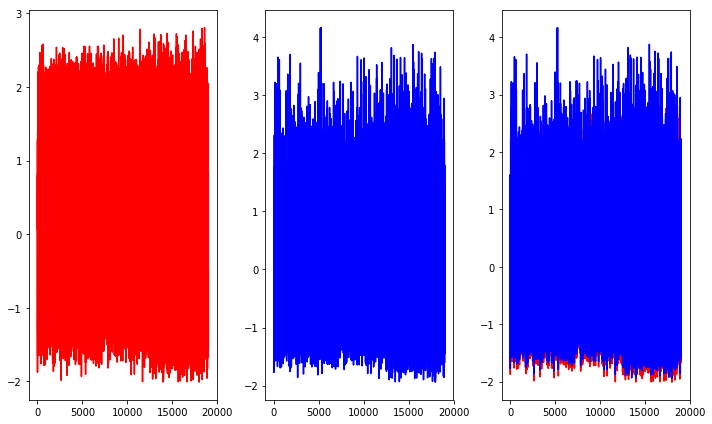

In [16]:
fig = plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.plot(range(df.shape[0]),df['fConc:'],'r')
plt.subplot(1,3,2)
plt.plot(range(df.shape[0]),df['fConc1:'],'b')
plt.subplot(1,3,3)
plt.plot(range(df.shape[0]),df['fConc:'],'r')
plt.plot(range(df.shape[0]),df['fConc1:'],'b')
fig.tight_layout()


From this visualization we can drop one of the feature in between fConc and fConc1. In last visualization, we can see it is overlaping most of the part.

In [17]:
df = df.drop(['fConc1:'],axis=1)
df.head()

,fLength:,fWidth:,fSize:,fConc:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,-0.577211,-0.336795,-0.381120,0.062758,0.541028,0.224812,-0.405831,0.476803,-1.497826,1
1,-0.510955,-0.570012,-0.648578,0.820362,0.516906,0.260357,-0.490081,-0.815397,0.153121,1
2,2.568210,6.205695,2.615714,-1.875834,2.044938,-1.478497,-2.182972,1.889174,0.842613,1
3,-0.694749,-0.687241,-1.029451,1.282035,0.532757,-0.333506,-0.355350,-0.658786,-1.031436,1
4,0.516609,0.476371,0.711138,-0.347497,-0.020200,0.353077,1.036593,-0.881016,2.176369,1


## Preliminary observation

* For this data simple classification is not important, since classifying h event as g is worse than classifying g event as h. For comparing different classifier it is better to use ROC curve.
* Data does not have any missing values or null values. Also from the data we can say that ID column is not important , we can just drop that from our dataframe.
* After normalization we may say it is better to visualize now. Conf is calculated using ratio of sum of two highest pixels over fSize and  fConc1 calculated by ratio of highest pixel over fSize. Also there values are pretty symmetrical, we can say from the visualiztion. So, it is not a harm to drop one of the column or drop both column and make a new one which is average of both.

# III. Method

Here, We implemented four classification algorithm. It is supervised learning, we have lable of our data. We implemented binary classification. So, output will be {-1 , 1}. Four method given below:

1.**Pocket Algorithm**:  In this binary classification method we just first predict our data and then compare with our lable. After that we try to update our weight according to it. We used 
$$
    \\w^{(k+1)} = w^{(k)} + alpha*t_i *x_i 
$$
this gradient equation. Here we give maximum iteration for that time we will update w unless it converged before. Only difference between this method and precepton algorithm is, we will pick best w in pocket algorithm among all w. It takes so much meomery and time to compute. 

2.**QDA** : It is also classification model but we can do multiclass classification in QDA. We use Gaussian Distribution and Naive Bayes theorem in this. We find prior which means probablity of one class coming in the data and sigma which is covariance of data. Then using that we find

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{x}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$
It will take a lot less time compare to pocket algorithm but accuracy wll be not that good.

3.**LDA** : It is same as QDA only difference between them is that, in LDA we will not take different sigma for different class instead we will see whole data's covariance. It is easily compute and take very less time and meomery.

4.**Logistic Regression** : It is kind of similar to pocket algorithm, just here we will use softmax function and we will use different weight for different class. There will be as much output as classes we have. We can also use sigmoid function instead of softmax. This kind of function is used so we can discrimate two class which has nearly exact probability. We will pick class which has highest value among all class probablity output. 
 

## Code Implemetation: 

* First we inheritent Abstract base class in our Basemodelclass. In that we define abstract method train and use. It is abstract method, we just pass in defination. So, we can overwrite in parent class.
* After that we make a class of Classifier which inheritent BaseModel class. Here we initialized w,stdX and meanX to none in _init_ method . Then check_matrix is just for checking that it is 2-d matrix. Add-ones is for adding bias means here we are adding ones in new first column. Normalize for normalizing given data using mean and stander deviation.Train and use is abstract method which we just pass.
* Now, in pocket algorithm I first intialize maxiter, init_w ,w_pocket and alpha. I give default value of maxiter to 10, alpha to one and init_w to ones. After I made train method. I am giving X data and T target lable as argument. First I am adding bias to data and then intialize weight with zero,one or random according to argument when we call this method. Now if it will converge then I will break the loop otherwise it will run maxiter times. I am also comparing weight with old weight and picking best weight among all. In use method, I am adding bias to data and just returning dot product of data and best weight. 
* Qda is quite simple. First I am finding prior and sigma of both classes after normalize the data using normalize function. Here, prior means probablity of particular class occurance and sigma means covariance of features. Then I made calculation fuction which will calculate delta. I made use method, in which I am finding delta of both class. And returning class which has bigger delta.
* LDA method is as similar as QDA. Just, there is only single sigma. 
* Now, last one is logistic regression. In that first I made softmax function and after using that I made g function. Then I used panda's dummmies function to make target dataframe with total column as total class and used that to intialize different weight for different class with zero,one or random. We will update each class weight maxiter time and if it converge before than it will break. In use method, I am just adding bias and then I just compare each class value for particular instance. Which class has higher value for that instance, we classify that instance to that class.   

### A. Super Classs Definition

In [18]:
import numpy as np
from abc import ABC, abstractmethod 
import abc
# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None
        self.w = None
        

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [19]:
class pocketalgorithm(Classifier): 
    
    def __init__(self,maxiter = 10 ,alpha =0.1 ,init_w = 'ones' ): #default parameter
        Classifier.__init__(self)
        self.maxiter = maxiter
        self.alpha = alpha
        self.w_pocket = None
        self.init_w = init_w
        
    def train(self, X, T):
        from copy import copy
        X =  self.add_ones(X)
        N = X.shape[0]
        
        if self.init_w == 'zero':
            self.w = np.zeros(X.shape[1])
        elif self.init_w == 'ones':
            self.w = np.ones(X.shape[1])
        elif self.init_w == 'random':
            self.w = np.random.rand(X.shape[1])

        self.w_pocket = copy(self.w)
        
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    if (np.sum(np.sign(X@self.w) == T) >= np.sum(np.sign(X@self.w_pocket) == T)): # it will take best w 
                        self.w_pocket[:] = self.w[:]   
            if converged:
                print("converged at ", i)
                break


           
    def use(self, X):
        X = self.add_ones(X)
        return X@self.w_pocket
          

### C. QDA

In [20]:
class QDA(Classifier):
    def __init__(self):
        super().__init__()
    
    def train(self,X,T):
        self.prior1 = np.sum([x==1 for x in T])/T.shape[0] 
        self.prior2 = np.sum([x==-1 for x in T])/T.shape[0]
        
        Xn = self.normalize(X)
        
        self.mean1 = np.mean(Xn[T==1],0)
        self.mean2 = np.mean(Xn[T==-1],0)
        self.sigma1 = np.cov(Xn[T==1].T)
        self.sigma2 = np.cov(Xn[T==-1].T)
    
    def calculation(self,X,mean,sigma,prior):
        import numpy as np 
        sigma_inv = np.linalg.inv(sigma)
        diff = X - mean
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diff @ sigma_inv * diff, axis=1) \
            + np.log(prior)
        
    def use(self,X):
        Xs = self.normalize(X) 
        d1 = self.calculation(Xs,self.mean1,self.sigma1,self.prior1)
        d2 = self.calculation(Xs,self.mean2,self.sigma2,self.prior2)
        return [1 if d1[i]>d2[i] else -1 for i in range(d1.shape[0])]
    
        
        
    

### D. LDA

In [21]:
class LDA(Classifier):
    def __init__(self):
        super().__init__()
    
    def train(self,X,T):
        self.prior1 = np.sum(T==1)/T.shape[0] 
        self.prior2 = np.sum(T==-1)/T.shape[0]
        
        Xn = self.normalize(X)
        
        self.mean1 = np.mean(Xn[T==1],0)
        self.mean2 = np.mean(Xn[T==-1],0)
        self.sigma = np.cov(Xn.T)
        self.sigma_inv = np.linalg.inv(self.sigma)
            
    def calculation(self,X,mean,prior):
        import numpy as np 
       
        return np.sum((X@self.sigma_inv) * mean \
                - 0.5 * (mean@self.sigma_inv) * mean \
                + np.log(prior), axis=1)
                      
    def use(self,X):
        Xs = self.normalize(X) 
        d1 = self.calculation(Xs,self.mean1,self.prior1)
        d2 = self.calculation(Xs,self.mean2,self.prior2)
        return [1 if d1[i]>d2[i] else -1 for i in range(d1.shape[0])]

### E. Logistic Regression

In [22]:
class LogisticRegression(Classifier):
    
    def __init__(self,maxiter = 10,alpha = 0.1,init_w = 'ones'):#default parameter
        super().__init__()
        self.maxiter = maxiter
        self.alpha = alpha
        self.init_w = init_w
        
    def softmax(self,X):
        ex = np.exp(X) 
        return ex / (np.sum(ex, axis=1, keepdims=True) if len(X.shape) == 2 else np.sum(ex))
    
    def g(self,X):
        return(self.softmax(X @ self.w))
        
    def train(self,X,T):
        X1 = self.add_ones(X)
        
        T1 = pd.get_dummies(T) 
        if self.init_w == 'zero':
            self.w = np.zeros((X1.shape[1],T1.shape[1]))
        elif self.init_w == 'ones':
            self.w = np.ones((X1.shape[1],T1.shape[1]))
        elif self.init_w == 'random':
            self.w = np.random.rand(X1.shape[1],T1.shape[1])
            
        for i in range(self.maxiter):
            converged = True
            y = self.g(X1)
            self.w += self.alpha *X1.T@ (T1 - y)
            if np.sum(self.use(X) == T) != T.shape[0]:
                converged = False
            if converged:
                break
            
    def use(self,X):
        X = self.add_ones(X)
        return [-1 if x[0]>x[1] else 1 for x in self.g(X)]
        

# IV. Experiments

## Disccusion  of different evaluation matrix

* First of all for experiment and to evaluate all algorithm, I devide my data in two part. First 70% of data for training the model and 30% for finding accuracy.
* I found confusion matrix of every algorithm from that we can get true negative(TN), true positive(TP), false positive(FP) and false negative(FN). Using this data we can find lots of measurement parameter to compare algorithms.

 
 --|- | + 
 --|--|--
 - | True Negative (TN) | False Negative (FN)
 + | False Positive (FP) | True Positive (TP)



- **Precision**: The accuracy of positive predictions. We can read this as *the ratio that my positive prediction is correct*.

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

* I also found accuracy of each algorithm and compare with each other. We can also compare algorithm using F1 score which is just harmonic mean of recall and precision.
* There are also two type of curve which we can use to measure algorithms. I used ROC curve to find best threshould for my pocket algorithm. We can also find area under curve of roc curve and compare with other algorithm. PR curve is just graph with x axis has value of precision and y axis has value of recall.
* I used classification report method of sklearn to give a summary of classification, which has recall,precision andf1 score of each class.
   

#### Splitting data 

In [23]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(df.loc[:,df.columns!='class:'],df.loc[:,'class:'],test_size = 0.3,random_state = 42)#splitting data 70% for train and 30% for test 
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

In [24]:
def confusionmatrix(y_true,y_pre):
    from sklearn.metrics import confusion_matrix as cm 
    Confusion_matrix = pd.DataFrame(cm(y_true,y_pre),index=[-1,1],columns=[-1,1])
    return Confusion_matrix

In [25]:
def accuracy(y_true,y_pre):
    from sklearn.metrics import accuracy_score 
    accuracy_score = accuracy_score(y_true,y_pre)
    return accuracy_score

In [26]:
def classification_report(y_true,y_pre):
    from sklearn.metrics import classification_report
    target_value = ['h','g']
    print(classification_report(y_true, y_pre,target_names= target_value)) 

### Pocket Algorithm Evaluation:

In [27]:
pa = pocketalgorithm(25,0.01,'random') 
# here first parameter is maxiter, second one is alpha rate and last one is for weight assignment
pa.train(X_train,Y_train)
pocket_pre = pa.use(X_test)

Text(0.5, 1.0, 'prediction after taking 0 as threshold')

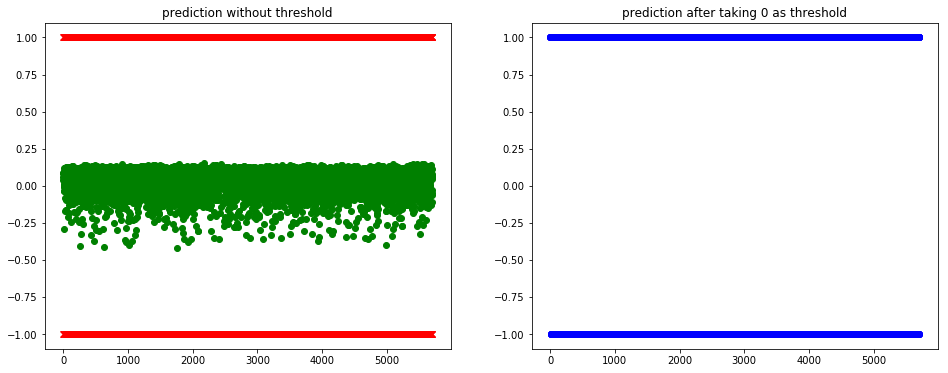

In [28]:
pocket_pre1 = [1 if i>0 else -1 for i in pocket_pre] #keeping threshold 0 
fig = plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(pocket_pre,'go')
plt.plot(Y_test,'rx')
plt.title('prediction without threshold')
plt.subplot(1,2,2)
plt.plot(pocket_pre1,'bo')
plt.title('prediction after taking 0 as threshold')

In [29]:
confusionmatrix(Y_test,pocket_pre1)

,-1,1
-1,1269,732
1,430,3275


In [30]:
print("Accuracy of pocket algorithm:",accuracy(Y_test,pocket_pre1)*100)

Accuracy of pocket algorithm: 79.63547143357869


In [31]:
classification_report(Y_test,pocket_pre1)

              precision    recall  f1-score   support

           h       0.75      0.63      0.69      2001
           g       0.82      0.88      0.85      3705

   micro avg       0.80      0.80      0.80      5706
   macro avg       0.78      0.76      0.77      5706
weighted avg       0.79      0.80      0.79      5706



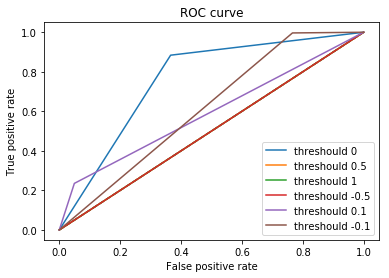

In [32]:
from sklearn.metrics import roc_curve
pocket_pre2 = [1 if i>0.5 else -1 for i in pocket_pre]
pocket_pre3 = [1 if i>=1 else -1 for i in pocket_pre]
pocket_pre4 = [1 if i>(-0.5) else -1 for i in pocket_pre]
pocket_pre5 = [1 if i>(0.1) else -1 for i in pocket_pre]
pocket_pre6 = [1 if i>(-0.1) else -1 for i in pocket_pre]

fpr_pa1, tpr_pa1, _ = roc_curve(Y_test,pocket_pre1)
fpr_pa2, tpr_pa2, _ = roc_curve(Y_test,pocket_pre2)
fpr_pa3, tpr_pa3, _ = roc_curve(Y_test,pocket_pre3)
fpr_pa4, tpr_pa4, _ = roc_curve(Y_test,pocket_pre4)
fpr_pa5, tpr_pa5, _ = roc_curve(Y_test,pocket_pre5)
fpr_pa6, tpr_pa6, _ = roc_curve(Y_test,pocket_pre6)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_pa1, tpr_pa1, label='threshould 0')
plt.plot(fpr_pa2, tpr_pa2, label='threshould 0.5')
plt.plot(fpr_pa3, tpr_pa3, label='threshould 1')
plt.plot(fpr_pa4, tpr_pa4, label='threshould -0.5')
plt.plot(fpr_pa5, tpr_pa5, label='threshould 0.1')
plt.plot(fpr_pa6, tpr_pa6, label='threshould -0.1')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


By seeing above roc curve, we can say threshoulds 0 is the way to go. We are getting diagonal line for 0.5,-0.5 and 1 because our data lie between 0.25 to -0.25. 

### QDA Evaluation:

In [33]:
qda = QDA()
qda.train(X_train,Y_train)
qda_pre = qda.use(X_test)

In [34]:
confusionmatrix(Y_test,qda_pre)

,-1,1
-1,931,1070
1,178,3527


In [35]:
print("Accuracy of QDA:",accuracy(Y_test,qda_pre)*100)

Accuracy of QDA: 78.12828601472135


In [36]:
classification_report(Y_test,qda_pre)

              precision    recall  f1-score   support

           h       0.84      0.47      0.60      2001
           g       0.77      0.95      0.85      3705

   micro avg       0.78      0.78      0.78      5706
   macro avg       0.80      0.71      0.72      5706
weighted avg       0.79      0.78      0.76      5706



### LDA Evaluation:

In [37]:
lda = LDA()
lda.train(X_train,Y_train)
lda_pre = lda.use(X_test)

In [38]:
confusionmatrix(Y_test,lda_pre)

,-1,1
-1,2,1999
1,0,3705


In [39]:
print("Accuracy of LDA:",accuracy(Y_test,lda_pre)*100)

Accuracy of LDA: 64.96670171749037


In [40]:
classification_report(Y_test,lda_pre)

              precision    recall  f1-score   support

           h       1.00      0.00      0.00      2001
           g       0.65      1.00      0.79      3705

   micro avg       0.65      0.65      0.65      5706
   macro avg       0.82      0.50      0.39      5706
weighted avg       0.77      0.65      0.51      5706



### Logistic Regression Evalution:

In [41]:
a = [0.01,0.005,0.001,0.0001,0.00001] # seeing at different alpha value
lr = [LogisticRegression(1000,0.01,'random'),LogisticRegression(1000,0.005,'random'),LogisticRegression(1000,0.001,'random'),LogisticRegression(1000,0.0001,'random'),LogisticRegression(1000,0.00001,'random')]
lr_pre = []
for i in range(5):
    lr[i].train(X_train,Y_train)
    lr_pre.append(lr[i].use(X_test))
    print('Accuracy at alpha',a[i],':',accuracy(Y_test,lr_pre[i])*100)

C:\Users\divya\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\divya\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Accuracy at alpha 0.01 : 64.931650893796
Accuracy at alpha 0.005 : 71.34595162986331
Accuracy at alpha 0.001 : 68.57693655800912
Accuracy at alpha 0.0001 : 79.1447599018577
Accuracy at alpha 1e-05 : 79.09218366631616


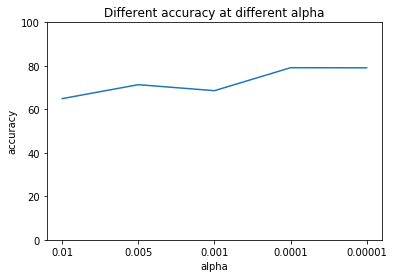

In [42]:
fig, ax = plt.subplots()
point = np.arange(5)
y = [accuracy(Y_test,i)*100 for i in lr_pre]
ax.plot(point,y)
ax.set(xlabel='alpha', ylabel='accuracy',
       title='Different accuracy at different alpha')
plt.xticks(point, ('0.01', '0.005', '0.001', '0.0001','0.00001'))
plt.ylim(0,100)
plt.show()



Maximum at alpha 0.0001 and now will be using this only .

In [ ]:
a = [0.01,0.005,0.001,0.0001,0.00001]
for i in range(5):
    print('Classification Report at',a[i],':')
    classification_report(Y_test,lr_pre[i])

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(Y_test,lr_pre[3])

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')

### Accuracy of each algorithm on train data to see overfitting is happening or not.

In [ ]:
pocket_pre_train = pa.use(X_train)
pocket_pre_train1 = [1 if i>0 else -1 for i in pocket_pre_train]
qda_pre_train = qda.use(X_train)
lda_pre_train = lda.use(X_train)
lr_pre_train = lr[3].use(X_train)

In [ ]:
print("Accuracy of Pocket Algorithm on train data:",accuracy(Y_train,pocket_pre_train1)*100)
print("Accuracy of QDA on train data:",accuracy(Y_train,qda_pre_train)*100)
print("Accuracy of LDA on train data:",accuracy(Y_train,lda_pre_train)*100)
print("Accuracy of Logistic Regression on train data:",accuracy(Y_train,lr_pre_train)*100)

## Comparing All the algorithms:

In [ ]:
temp = np.arange(4)
temp1 = [accuracy(Y_test,pocket_pre1)*100,accuracy(Y_test,qda_pre)*100,accuracy(Y_test,lda_pre)*100,accuracy(Y_test,lr_pre[3])*100]
temp2 = [accuracy(Y_train,pocket_pre_train1)*100,accuracy(Y_train,qda_pre_train)*100,accuracy(Y_train,lda_pre_train)*100,accuracy(Y_train,lr_pre_train)*100]
fig = plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.bar(temp, temp1)
plt.xticks(temp, ('pocket algorithm', 'QDA', 'LDA', 'Logistic Regression'))
plt.ylabel('Accuracy')
plt.ylim(0,100)
for i in range(4):
    plt.text(i,temp1[i]/2+20,str(temp1[i]),rotation = 90)
plt.title('On test data')    
plt.subplot(1,2,2)
plt.bar(temp, temp2,color = 'red')
plt.xticks(temp, ('pocket algorithm', 'QDA', 'LDA', 'Logistic Regression'))
plt.ylabel('Accuracy')
plt.ylim(0,100)
for i in range(4):
    plt.text(i,temp2[i]/2+20,str(temp2[i]),rotation = 90)
plt.title('On train data')  
plt.show()

# Conclusions

* I learned and implemented four different kind of binary classification method Pocket algorithm, QDA , LDA and logistic regression. I also learned different measurment like precision, recall, F1 score, Roc curve, PR curve etc.
* I learned different pandas method and sckit method while completing this assignment.
* I got highest accuracy while using Pocket algorithm of almost 80% but it take more time. I am using maximum 25 iteration here. It is hard to compute it take lot of meoemry. For finding threshould, I used ROC curve. I also learned that after some iteration there will be not much variance happen in weights. Also I think, it is better to make random intial weight than intial weight of one or zero. 
* QDA and LDA is based on naive bayes equation and gaussian distribuation. They are faster and we don't have different parameter like learning rate and weight but It is less accurate. Particular on my data. LDA is weekest among all the algorithms for my data. 
* I found accuracy for different learning rate in logistic regression. I found maximum accuracy at 0.0001 alpha rate. We can use cross-validation to find best weight and alpha rate. I think in this method it is safe to put very less alpha rate than compare to other method.
* It is very hard to get converged matrix in pocket and logistic regression method.  
* Splitting data is also important while finding accuracy. If we keep less data in training then there will be chance of overfitting. I found accuracy on trainig and testing data, it has not much difference. So, I can say my data is not getting overfit.


# References

* http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.Sol.ipynb
* http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb
* https://stackoverflow.com
* http://scikit-learn.org/stable/modules/model_evaluation.html
* Classification data : https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points |-- | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)